<a href="https://colab.research.google.com/github/xiaomuc/opencv/blob/master/OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import sys
import matplotlib.pylab as plt
from google.colab import drive
drive.mount('/content/gdrive')
%matplotlib inline
cv2.__version__

Mounted at /content/gdrive


'4.1.2'

In [2]:
# path
starry_night = "/content/gdrive/MyDrive/tutorial/starry_night.jpg"

In [35]:
font = cv2.FONT_HERSHEY_SIMPLEX
def put_text(image,text,org=(10,30),size=1,thickness=2,color=(255,255,255)):
  copy_image = image.copy()
  cv2.putText(copy_image,text,org,font,size,color,thickness,cv2.LINE_AA)
  return copy_image

def simple_show(image):
  fig = plt.figure(figsize=(20,20))
  img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(img)

def list_show(image_list,num_col=1,width=20,height=12):
  num_row, mod = divmod(len(image_list),num_col)
  if mod > 0:
    num_row += 1
  fig = plt.figure(figsize=(width, num_row * (height // num_col)))
  for i,image in enumerate(image_list):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    ax = plt.subplot(num_row,num_col,i+1)
    ax.imshow(image)  

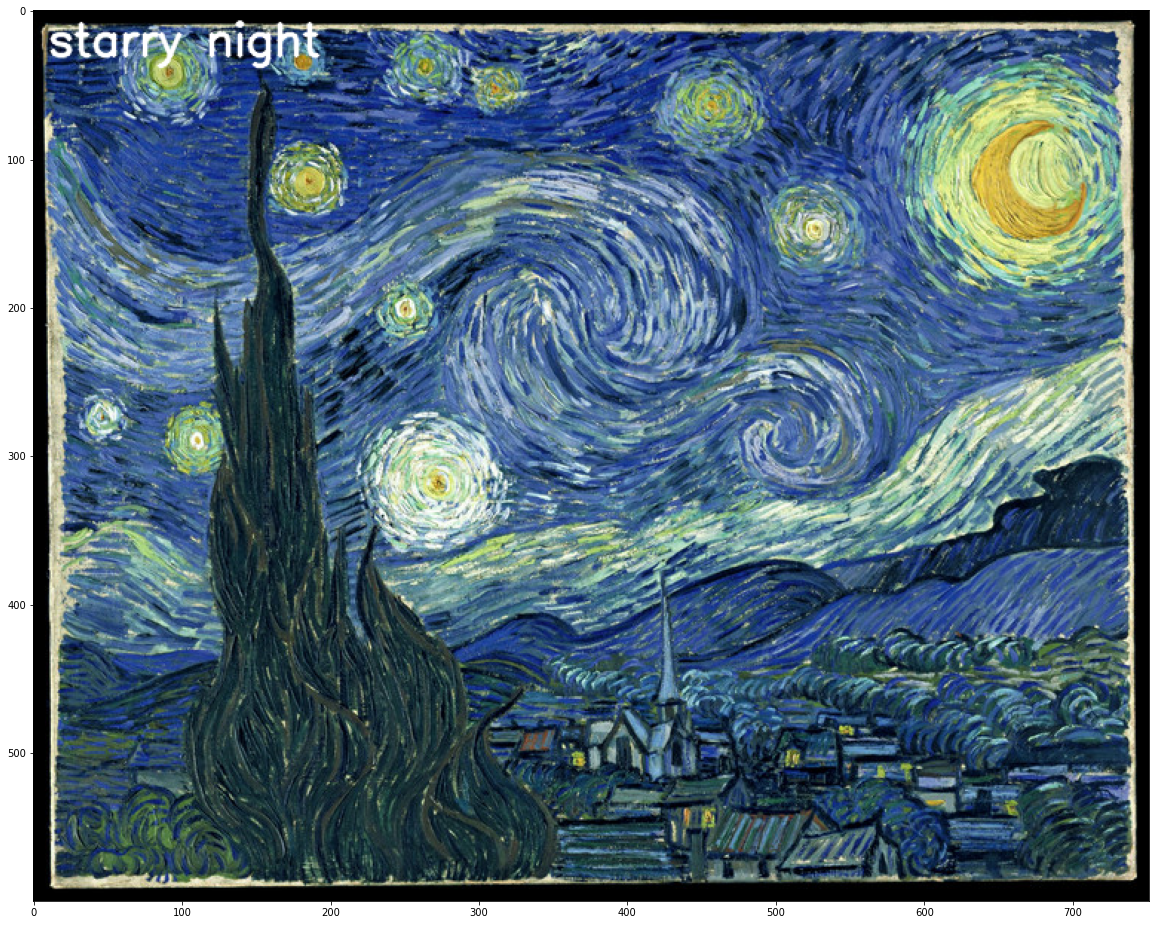

In [37]:
image = cv2.imread(starry_night)
img = put_text(image,"starry night")
simple_show(img)

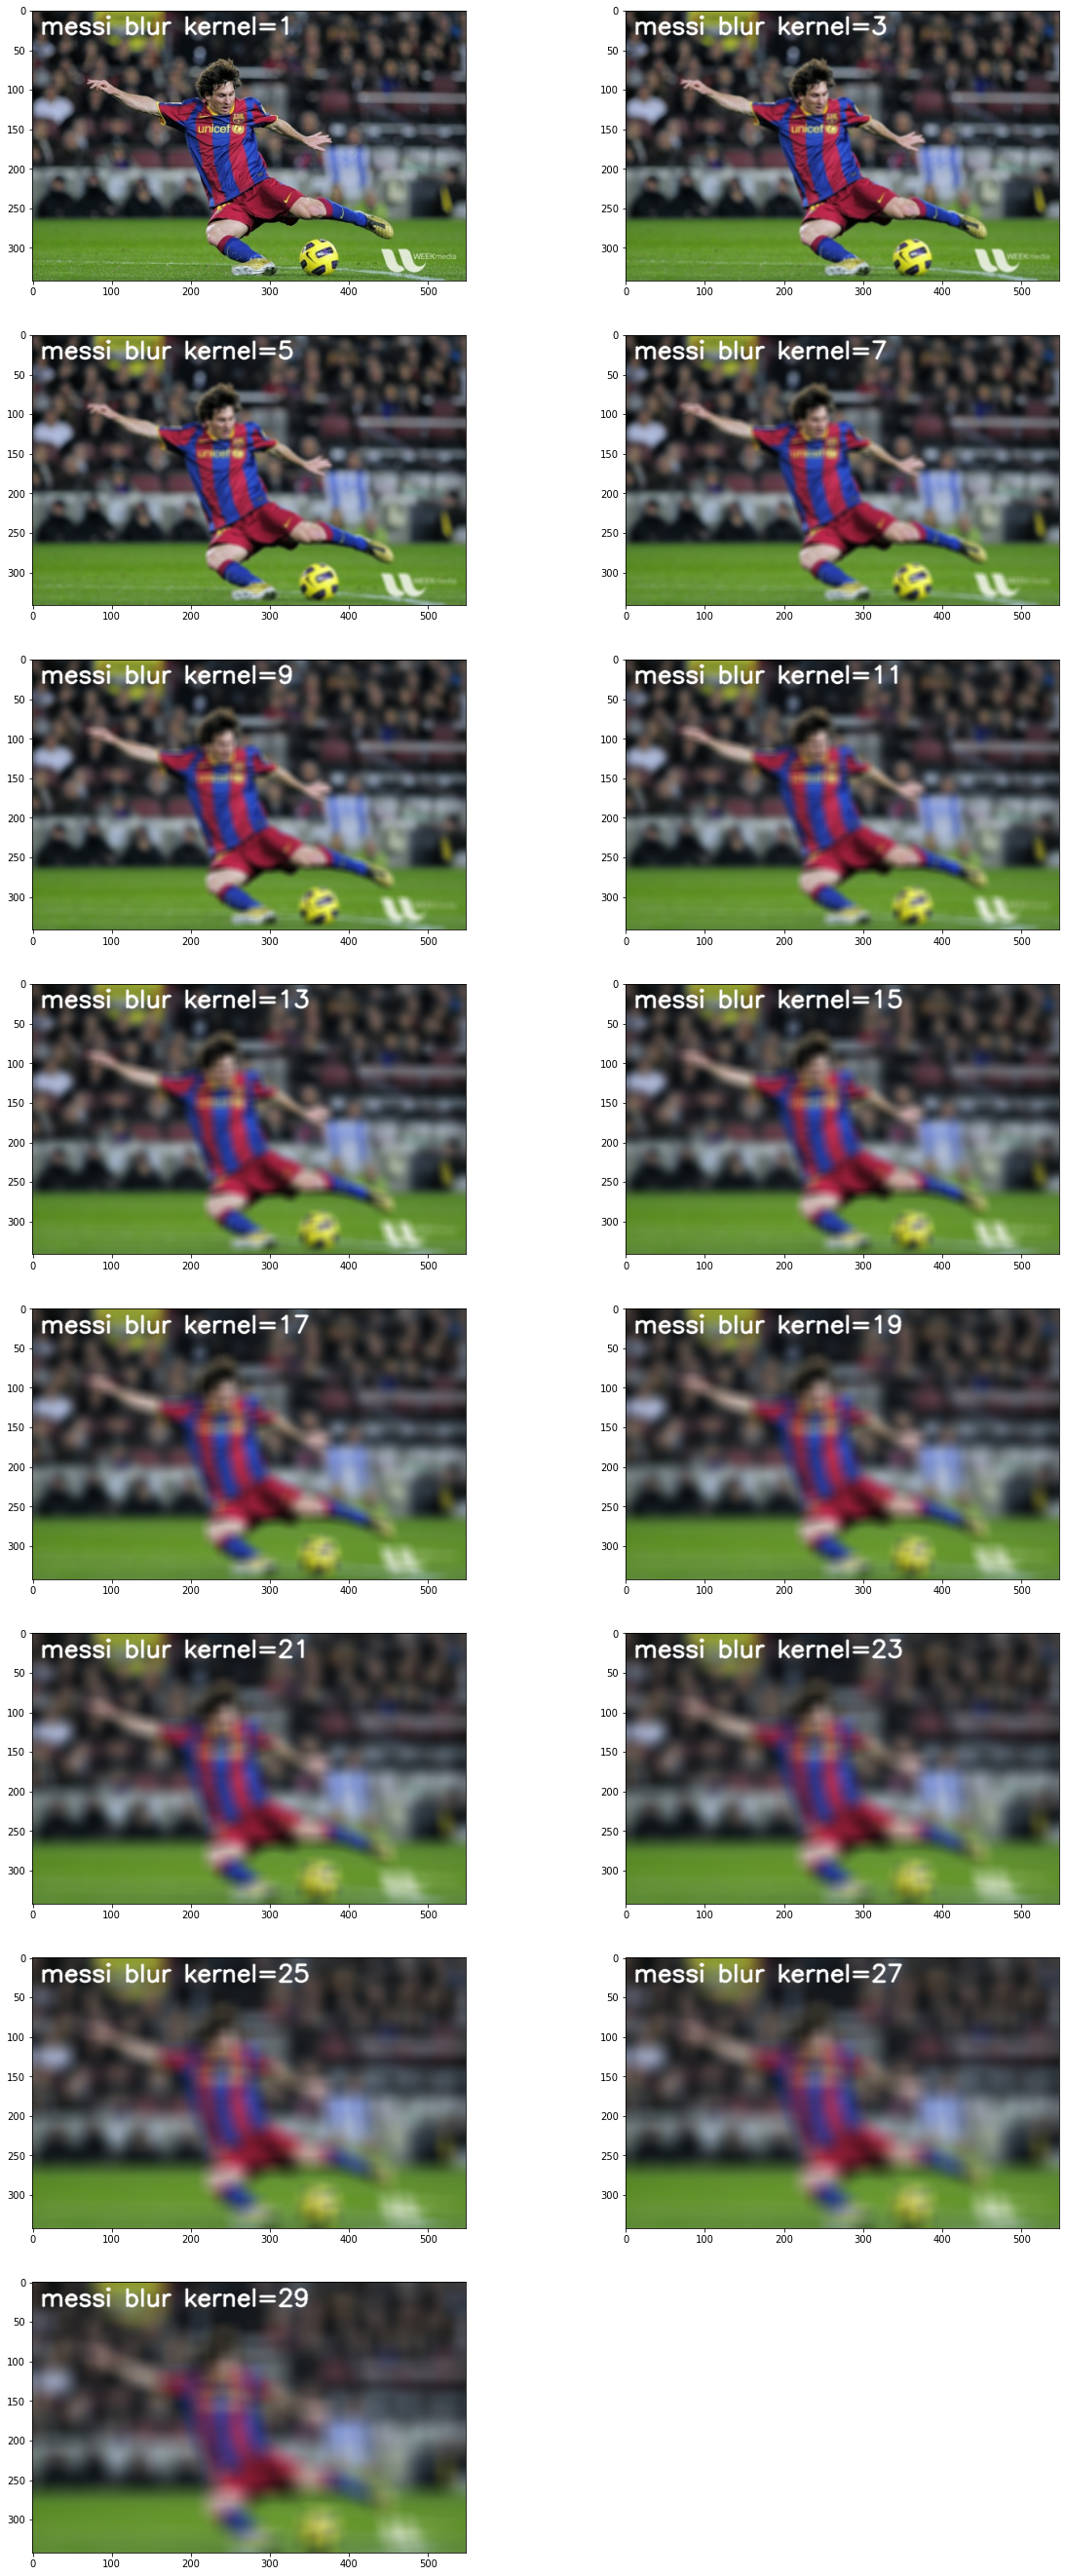

In [38]:
# filter
MAX_KERNEL_LENGTH = 31
img = cv2.imread('/content/gdrive/MyDrive/tutorial/messi5.jpg')
image_list = list()
for i in range(1,MAX_KERNEL_LENGTH, 2):
  dst = cv2.blur(img,(i,i))
  dst = put_text(dst,"messi blur kernel={0}".format(i))
  image_list.append(dst)

list_show(image_list,num_col=2)

In [49]:
# sobel
def sobel(image):
  src = cv2.GaussianBlur(image, (3,3), 0)
  gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
  grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
  abs_grad_x = cv2.convertScaleAbs(grad_x)
  abs_grad_y = cv2.convertScaleAbs(grad_y)
  grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
  return grad

def laps(image):
  src = cv2.GaussianBlur(image,(3,3),0)
  src_gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
  dst = cv2.Laplacian(src_gray,cv2.CV_16S,ksize=5)
  abs_dst = cv2.convertScaleAbs(dst)
  return abs_dst

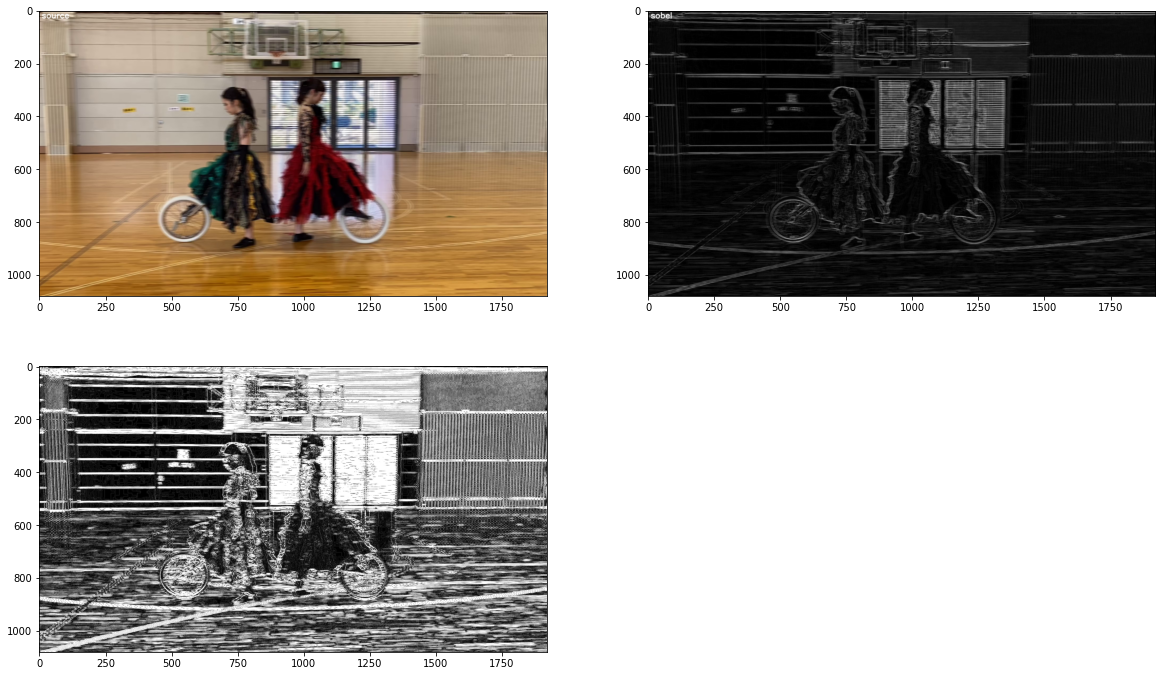

In [52]:
image = cv2.imread('/content/gdrive/MyDrive/background/homura0001.png')
image_list = list()
image_list.append(put_text(image,"source"))

s = sobel(image)
image_list.append(put_text(s,"sobel"))

lp = laps(image)
image_list.append(put_text(lp,"laplacian"))


list_show(image_list,num_col=2)